In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
import scipy.io as sio
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [21]:
dados_teste = sio.loadmat('dados_teste.mat')
dados_treino = sio.loadmat('dados_treinamento.mat')
dados_valid = sio.loadmat('dados_val.mat')

X_test = np.array(dados_teste["Xt"])
y_test =  np.array(dados_teste["yt"])
X_train =  np.array(dados_treino["X"])
y_train =  np.array(dados_treino["y"])
X_valid =  np.array(dados_valid["Xval"])
y_valid =  np.array(dados_valid["yval"])

#iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
#Y = iris.target

X = X_train
Y = y_train

def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
#clf = svm.SVC(kernel=my_kernel)

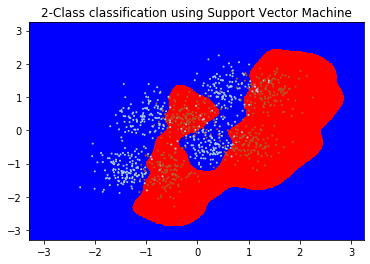

In [22]:
#clf = svm.SVC(gamma='scale')
clf = svm.SVC(gamma=10)
clf.fit(X, Y.ravel())

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap=plt.cm.bwr, edgecolors='k', s=10)
#plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap=plt.cm.bwr, s=5, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap=plt.cm.Paired, s=1)
#plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap=plt.cm.bwr, s=5, edgecolors='k')
#plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=1,
#                facecolors='none', zorder=10, edgecolors='k')
#print(clf.support_vectors_[:, 0].shape[0], X[:, 0].shape[0])
plt.title('2-Class classification using Support Vector Machine')
plt.axis('tight')
plt.show()

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap=plt.cm.bwr, s=1)
#plt.show()

In [25]:
gamma_array = np.arange(0.1, 100, 0.1)
cv = 5
this_scores = np.ones((len(gamma_array), ))

for i in range(len(gamma_array)):
    clf = svm.SVC(gamma=gamma_array[i])
    clf.fit(X, Y.ravel())
    this_scores[i] = clf.score(X_valid, y_valid)

In [26]:
this_scores

array([0.702, 0.716, 0.764, 0.837, 0.846, 0.853, 0.858, 0.859, 0.862,
       0.866, 0.866, 0.87 , 0.872, 0.868, 0.869, 0.869, 0.868, 0.87 ,
       0.868, 0.869, 0.867, 0.867, 0.866, 0.866, 0.867, 0.867, 0.866,
       0.867, 0.868, 0.867, 0.867, 0.869, 0.869, 0.868, 0.868, 0.869,
       0.87 , 0.87 , 0.868, 0.868, 0.867, 0.869, 0.872, 0.871, 0.871,
       0.87 , 0.87 , 0.87 , 0.87 , 0.87 , 0.873, 0.873, 0.874, 0.872,
       0.872, 0.872, 0.872, 0.872, 0.874, 0.873, 0.873, 0.874, 0.874,
       0.874, 0.874, 0.874, 0.874, 0.874, 0.874, 0.874, 0.875, 0.876,
       0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876,
       0.875, 0.874, 0.874, 0.874, 0.872, 0.872, 0.871, 0.871, 0.871,
       0.871, 0.871, 0.873, 0.874, 0.874, 0.873, 0.874, 0.875, 0.874,
       0.874, 0.873, 0.873, 0.873, 0.872, 0.872, 0.872, 0.87 , 0.871,
       0.871, 0.873, 0.872, 0.872, 0.872, 0.872, 0.871, 0.871, 0.871,
       0.871, 0.87 , 0.87 , 0.87 , 0.87 , 0.87 , 0.871, 0.871, 0.871,
       0.871, 0.871,